# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# response = requests.get(query_url+'longyearbyen').json()
# response

In [56]:
# set lists for the dataframe
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []
city_id = []
city_2 = []
counter = 0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        city_2.append(response["name"])
        counter = counter + 1
        print(f"Processing Record {counter} | {city}")
    except:
        print("City Not Found. Skipping...")
print("City check complete")

Processing Record 1 | geraldton
Processing Record 2 | cidreira
Processing Record 3 | bredasdorp
Processing Record 4 | saint-pierre
Processing Record 5 | busselton
Processing Record 6 | talnakh
Processing Record 7 | avarua
Processing Record 8 | hasaki
Processing Record 9 | sao filipe
Processing Record 10 | tabas
Processing Record 11 | tasiilaq
Processing Record 12 | cape town
Processing Record 13 | port alfred
Processing Record 14 | guatire
Processing Record 15 | shingu
City Not Found. Skipping...
Processing Record 16 | filadelfia
Processing Record 17 | mataura
Processing Record 18 | hilo
Processing Record 19 | mana
Processing Record 20 | esperance
Processing Record 21 | normandin
Processing Record 22 | albany
Processing Record 23 | punta arenas
Processing Record 24 | ishigaki
Processing Record 25 | sitka
Processing Record 26 | konde
Processing Record 27 | yellowknife
Processing Record 28 | whitehorse
Processing Record 29 | hermanus
Processing Record 30 | mount gambier
Processing Record

Processing Record 234 | dalbandin
Processing Record 235 | caledonia
City Not Found. Skipping...
Processing Record 236 | alexandria
Processing Record 237 | kudahuvadhoo
Processing Record 238 | vao
Processing Record 239 | hobyo
Processing Record 240 | la rioja
Processing Record 241 | hovd
Processing Record 242 | samana
Processing Record 243 | saldanha
Processing Record 244 | norman wells
Processing Record 245 | tautira
Processing Record 246 | tiksi
Processing Record 247 | mount isa
Processing Record 248 | werda
Processing Record 249 | polson
Processing Record 250 | crib point
Processing Record 251 | provideniya
Processing Record 252 | adrar
Processing Record 253 | paita
Processing Record 254 | samarai
Processing Record 255 | ljungby
Processing Record 256 | kapit
Processing Record 257 | souillac
Processing Record 258 | innisfail
Processing Record 259 | lincoln
Processing Record 260 | ahipara
Processing Record 261 | front royal
Processing Record 262 | idil
Processing Record 263 | pucallpa


Processing Record 464 | pangnirtung
Processing Record 465 | port lincoln
Processing Record 466 | elk point
Processing Record 467 | barinitas
Processing Record 468 | chifeng
Processing Record 469 | esil
Processing Record 470 | verkhnevilyuysk
Processing Record 471 | juneau
Processing Record 472 | kaitangata
Processing Record 473 | vila velha
Processing Record 474 | kaseda
Processing Record 475 | lavrentiya
Processing Record 476 | pinawa
Processing Record 477 | matadi
Processing Record 478 | pisco
Processing Record 479 | beohari
Processing Record 480 | koygorodok
Processing Record 481 | dahra
Processing Record 482 | kasongo
Processing Record 483 | charters towers
Processing Record 484 | buraydah
Processing Record 485 | yerbogachen
Processing Record 486 | si bun ruang
Processing Record 487 | nongstoin
Processing Record 488 | north platte
Processing Record 489 | rovaniemi
Processing Record 490 | dekar
Processing Record 491 | shimoda
Processing Record 492 | sinnamary
Processing Record 493 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
# create a dictionary for establishing dataframe
weather_dict = {
     "City":city_2,
     "Cloudiness":cloudinesses,
     "Country":countries,
     "Date":dates,
     "Humidity":humidities,
     "Lat":lats,
     "Lng":lngs,
     "Max Temp":max_temps,
     "Wind Speed":wind_speeds
 }

#create dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Geraldton,0,AU,1604676761,88,-28.77,114.60,19.00,0.50
1,Cidreira,3,BR,1604676761,70,-30.18,-50.21,21.45,6.68
2,Bredasdorp,100,ZA,1604676761,59,-34.53,20.04,17.00,5.10
3,Saint-Pierre,75,RE,1604676761,69,-21.34,55.48,24.00,8.70
4,Busselton,1,AU,1604676761,71,-33.65,115.33,16.11,1.34


In [58]:
#output to csv
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
#  Get the indices of cities that have humidity over 100%.
humid_city = weather_df.loc[weather_df["Humidity"]>100, :]
humid_city

#No cities have humidity over 100%

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [60]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[weather_df["City"].isin(humid_city["City"])==False]
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Geraldton,0,AU,1604676761,88,-28.77,114.60,19.00,0.50
1,Cidreira,3,BR,1604676761,70,-30.18,-50.21,21.45,6.68
2,Bredasdorp,100,ZA,1604676761,59,-34.53,20.04,17.00,5.10
3,Saint-Pierre,75,RE,1604676761,69,-21.34,55.48,24.00,8.70
4,Busselton,1,AU,1604676761,71,-33.65,115.33,16.11,1.34


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

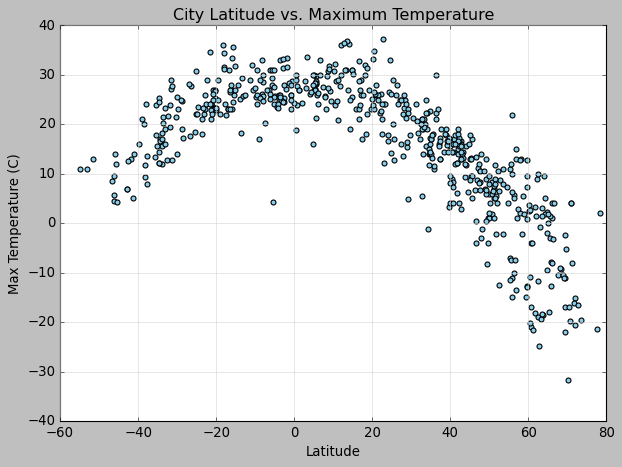

In [78]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.xlim(-60,80)
plt.ylim(-40,40)
plt.savefig("Output/Lat_MaxTemp")
plt.show()

## Latitude vs. Humidity Plot

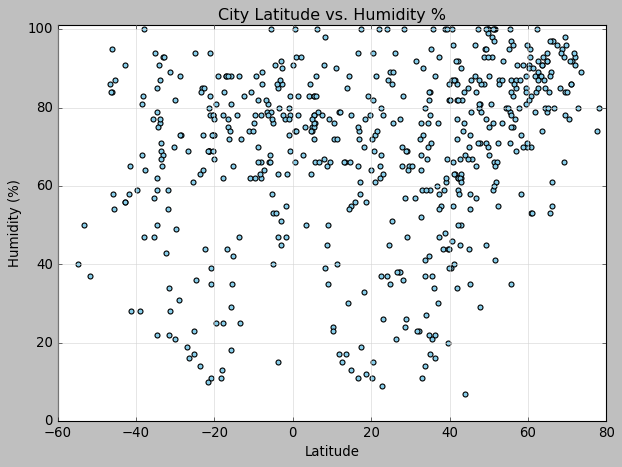

In [79]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.xlim(-60,80)
plt.ylim(0,101)
plt.savefig("Output/Lat_Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

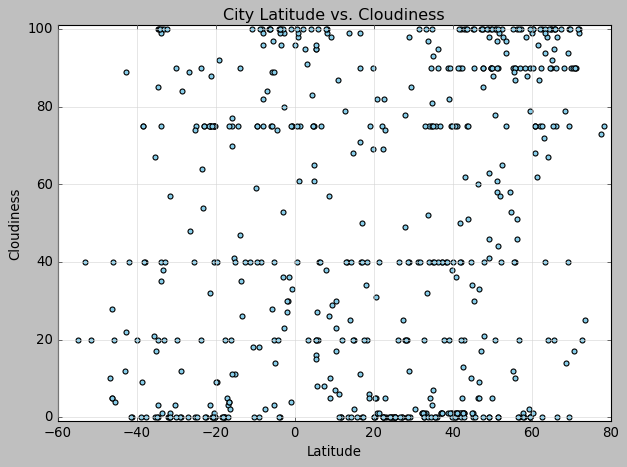

In [80]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlim(-60,80)
plt.ylim(-1,101)
plt.tight_layout()
plt.savefig("Output/Lat_Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

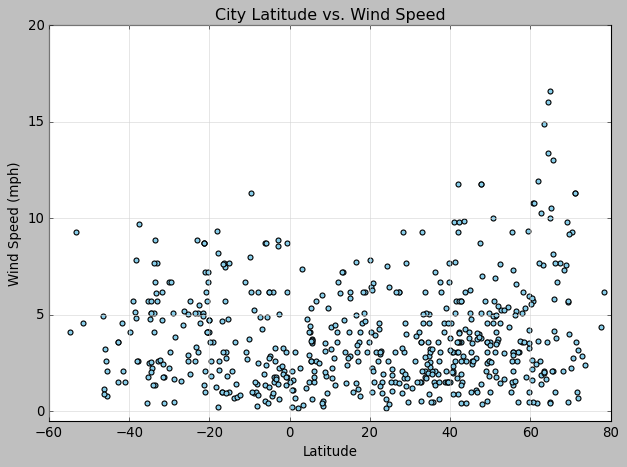

In [81]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlim(-60,80)
plt.ylim(-0.5, 20)
plt.tight_layout()
plt.savefig("Output/Lat_WindSpeed")
plt.show()

## Linear Regression

In [65]:
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]
southern = clean_city_data.loc[clean_city_data["Lat"] <= 0, :]

In [66]:
def lin_regress (x,y, title, coordinates, hemisphere, x_lim, y_lim):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, s=10)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.ylabel(title)
    plt.xlabel('Latitude')
    plt.title(f'Latitude vs {title} ({hemisphere} Hemisphere)')
    plt.style.use("classic")
    plt.savefig(f"Output/{hemisphere}_Lat_{title}")
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.tight_layout()
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

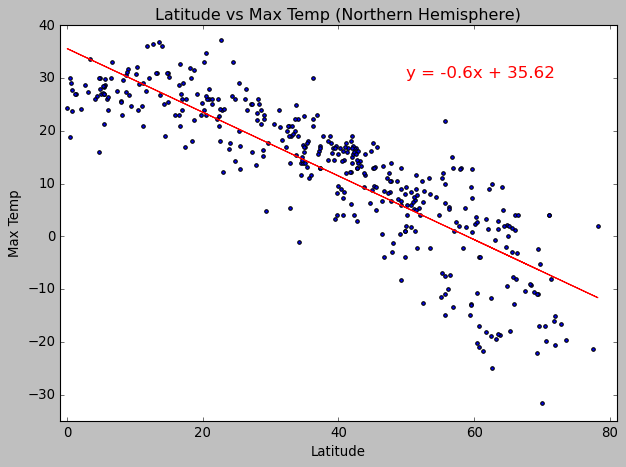

In [67]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]
lin_regress(x_values, y_values, "Max Temp", (50,30), "Northern",(-1,81), (-35, 40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

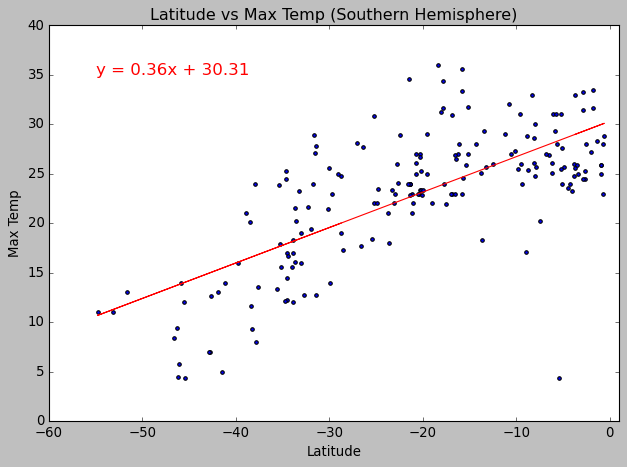

In [68]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]
lin_regress(x_values, y_values, "Max Temp", (-55,35), "Southern", (-60, 1), (0,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

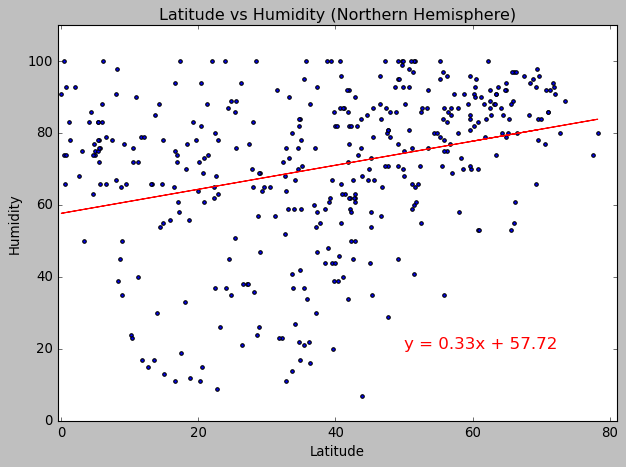

In [69]:
x_values = northern["Lat"]
y_values = northern["Humidity"]
lin_regress(x_values, y_values, "Humidity", (50,20), "Northern", (-.5, 81), (0,110))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

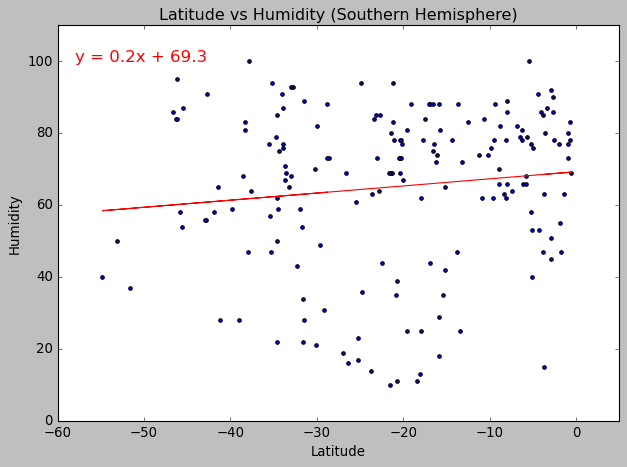

In [70]:
x_values = southern["Lat"]
y_values = southern["Humidity"]
lin_regress(x_values, y_values, "Humidity", (-58,100), "Southern", (-60,5), (0,110))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

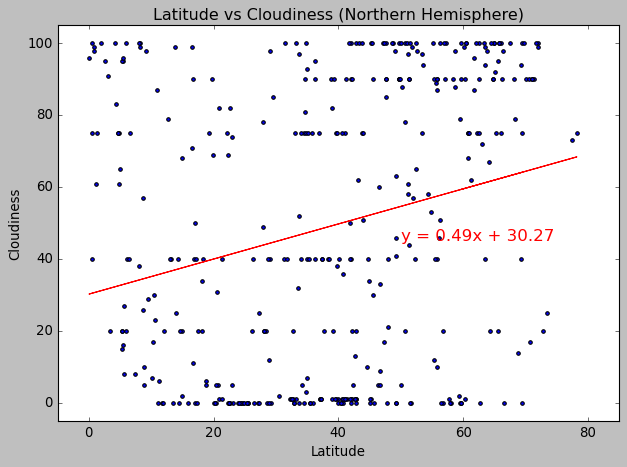

In [71]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
lin_regress(x_values, y_values, "Cloudiness", (50,45), "Northern", (-5, 85), (-5,105))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

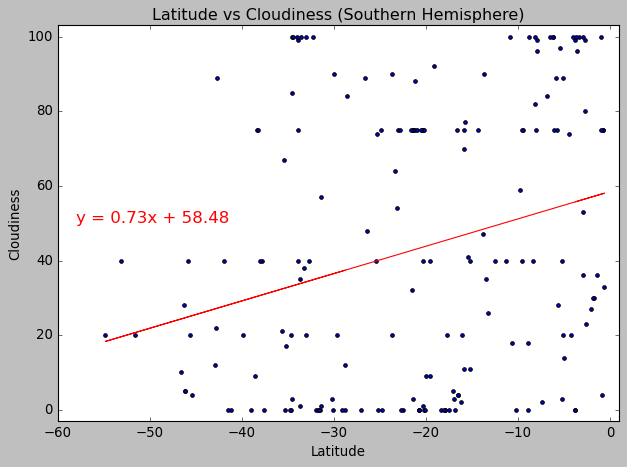

In [72]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
lin_regress(x_values, y_values, "Cloudiness", (-58,50), "Southern", (-60,1), (-3,103))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

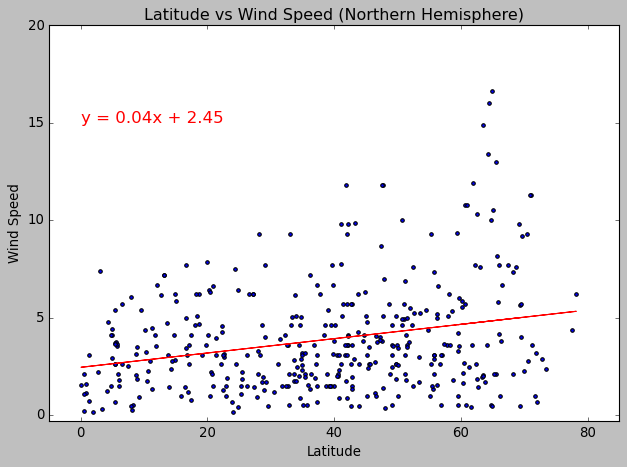

In [73]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
lin_regress(x_values, y_values, "Wind Speed", (0,15), "Northern", (-5, 85), (-0.3,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

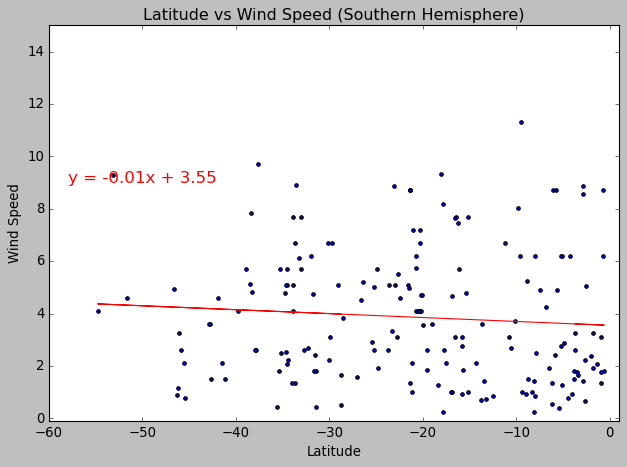

In [74]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
lin_regress(x_values, y_values, "Wind Speed", (-58,9), "Southern", (-60,1), (-0.1,15))

In [1]:
#Observations of WeatherPy
#1) The curvature on the maximum temperature v latitude chart indicates that the 
    #countries that are closer to 0 latitude generaly have a higher maximum temperature.
#2) The latitude v humidity charts show that as the latitudes become higher (more north) 
    #humidity steadily increased. 
#3) The graphs displaying latitude v wind speed indicate that there is no correlation 
    #between the two values, latitude is not an accurate indicator of wind speed. 